This script creates a Convolutional Neural Network that models handwritten digits in the MNIST database. The network template is from "Python for Scientific Computing and Artificial Intelligence" by Dr. Stephen Lynch. Below are some interesting visuals.

In [1]:
import tensorflow as tf
tf.random.set_seed(21399207)      #For reproducibility.
import numpy as np
import time
import matplotlib.pyplot as plt

The script below calculates a **99.15%** accurate model of predicting handwritten digits from MNIST, given the seed in the cell above. The model run time is 27.5 minutes (enough time to grab a coffee). Increasing stride to (2,2) in the Conv2D layers will result in a much faster model (2.5 minutes) but loses 0.5% accuracy. The choice of stride length depends largely on resources available (**WARNING:** takes 25-30 minutes to run).

In [4]:

#Loading MNIST (from Keras)
mnist = tf.keras.datasets.mnist # Digits 0-9, 28x28 pixels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalising the data.
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# Building the CNN.
input_shape=(28,28,1)
inputs = tf.keras.layers.Input(shape=input_shape)

#####Convolutional layers#####
layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), \
strides=(1,1), activation=tf.nn.relu)(inputs)

layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), \
strides=(1,1), activation=tf.nn.relu)(layer)
#####--------------------#####


#####Flattening layer#####
layer = tf.keras.layers.Flatten()(layer)
#####----------------#####


######Fully connected layers#####
layer = tf.keras.layers.Dense(128, activation = tf.nn.relu)(layer)

layer = tf.keras.layers.Dense(128, activation = tf.nn.relu)(layer)
#####-----------------------#####


#####Output layer#####
outputs=tf.keras.layers.Dense(10,activation=tf.nn.softmax)(layer)
#####------------#####


# Compile the CNN.
model = tf.keras.Model(inputs, outputs)    #Initialise the CNN
model.summary()
model.compile(optimizer='adam',            #Compiling the CNN using the layers given above
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
StartTime = time.time()   #Starting a timer
model.fit(x_train, y_train, epochs = 3)
EndTime = time.time()     #Stopping the timer
print("###### Total Time Taken: ",EndTime - StartTime, ' seconds, or approximately ', round((EndTime - StartTime) / 60), 'Minutes ######')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        102464    
                                                                 
 flatten_2 (Flatten)         (None, 25600)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3276928   
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290

By setting **image_index** to any value $0≤x<10000$ , images from MNIST can be viewed in the viridis color mapping, along with the prediction made by the model. This allows us to visually verify predictions.

1/1 [==============================] - 0s 129ms/step


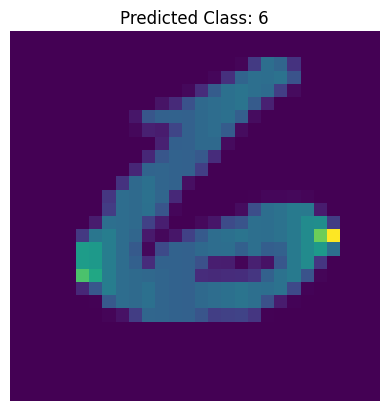

In [26]:
# Select an image from the MNIST dataset
image_index = 9999
selected_image = x_test[image_index]

# Reshape the image
reshaped_image = selected_image.reshape((1, 28, 28, 1))

# Runs the CNN for the chosen image
prediction = model.predict(reshaped_image)

#Finds index of output neuron with highest activation
predicted_class_index = np.argmax(prediction)

# Display the prediction
plt.imshow(selected_image) #, cmap='gray'
plt.title(f'Predicted Class: {predicted_class_index}')
plt.axis('off')
plt.show()

The cell below prints a table of correct and incorrect predictions for each digit. The aim was to understand the distribution of incorrect predictions; whether some digits are harder to learn than others, or if the chance of incorrectly classifying a digit is random (**WARNING:** takes 15-20 minutes to run).

In [29]:
# Initialize counts for correct and incorrect predictions for each digit
correct_counts = np.zeros(10, dtype=int)
incorrect_counts = np.zeros(10, dtype=int)

# Iterate through the test images
StartTime = time.time()
for i in range(len(x_test)):
    # Reshape the image
    reshaped_image = x_test[i].reshape((1, 28, 28, 1))

    # Make a prediction
    prediction = model.predict(reshaped_image, verbose=0)

    # Find the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Check if the prediction is correct
    if predicted_class_index == y_test[i]:
        correct_counts[y_test[i]] += 1
    else:
        incorrect_counts[y_test[i]] += 1
EndTime = time.time()

# Calculate total correct and incorrect predictions
total_correct = np.sum(correct_counts)
total_incorrect = np.sum(incorrect_counts)
# Calculate total accuracy
total_accuracy = (total_correct / (total_correct + total_incorrect)) * 100 if (total_correct + total_incorrect) > 0 else 0

# Display the combined table
print("| Digit | Correct Count | Incorrect Count | Accuracy (%) |")
print("|-------|---------------|-----------------|--------------|")
for digit in range(10):
    total_predictions_digit = correct_counts[digit] + incorrect_counts[digit]
    accuracy_digit = (correct_counts[digit] / total_predictions_digit) * 100 if total_predictions_digit > 0 else 0
    print(f"|   {digit}   |      {correct_counts[digit]}        |       {incorrect_counts[digit]}        |      {accuracy_digit:.2f}     |")
print("|-------|---------------|-----------------|--------------|")
print(f"| Total |      {total_correct}        |       {total_incorrect}        |      {total_accuracy:.2f}     |")
print("----------------------------------------------------------")
print("###### Total Time Taken: ",EndTime - StartTime, ' seconds, or approximately ', round((EndTime - StartTime) / 60), 'Minutes ######')


| Digit | Correct Count | Incorrect Count | Accuracy (%) |
|-------|---------------|-----------------|--------------|
|   0   |      974        |       6        |      99.39     |
|   1   |      1127        |       8        |      99.30     |
|   2   |      1018        |       14        |      98.64     |
|   3   |      1002        |       8        |      99.21     |
|   4   |      960        |       22        |      97.76     |
|   5   |      880        |       12        |      98.65     |
|   6   |      947        |       11        |      98.85     |
|   7   |      1019        |       9        |      99.12     |
|   8   |      946        |       28        |      97.13     |
|   9   |      997        |       12        |      98.81     |
#############################################################
###### Total Time Taken:  1056.0082302093506  seconds, or approximately  18 Minutes ######


The cells below were used for some fancy visuals of the input, convolutional and flattening layers respectively.

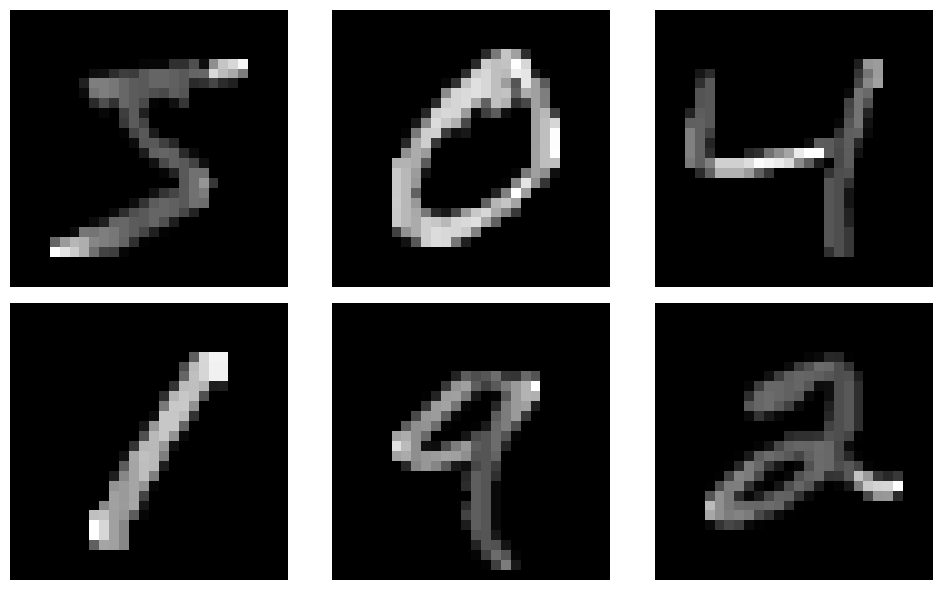

In [6]:
# Define the dimensions of the lattice
rows = 2
cols = 3

# Plot the images
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Display the first 6 images
for i in range(rows * cols):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 89ms/step


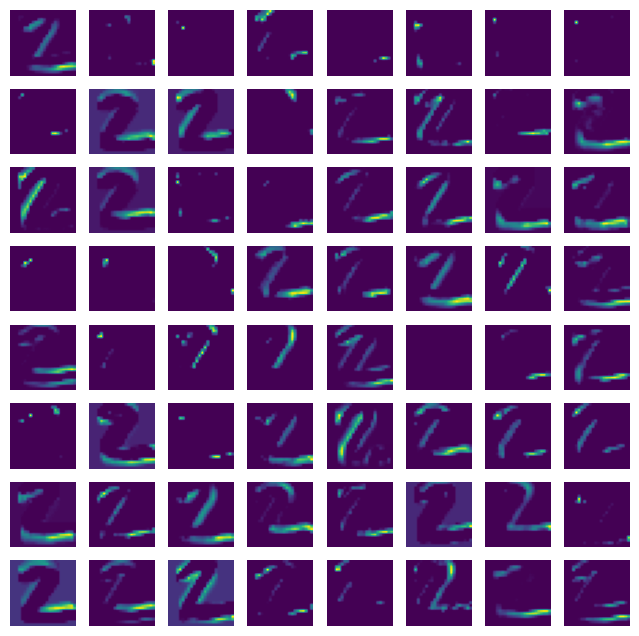

In [39]:
activation_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)   #[1] represents the first conv layer. Try changing to [2] to see the output of the 2nd Conv2d layer.


image_index = 1                                     #Change image_index for a different image
image = x_test[image_index].reshape(1, 28, 28, 1)

activations = activation_model.predict(image)

#Plot the activations for the first image                          #This creates a lattice of the 64 outputs for the image.
plt.figure(figsize=(8, 8))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

# plt.imshow(activations[0, :, :, 1], cmap='viridis')               #This shows just one image from the lattice above. Change 1 to any value 0<=x<63.
# plt.axis('off')

The cell below shows the effect of the flattening layer. It's quite straight-forward. The viridis colour mapping is reversed at the next step so the column of pixels becomes a column vector of numerical values.

1/1 [==============================] - 0s 98ms/step


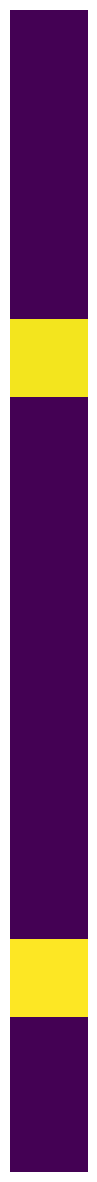

Numerical values of the first 15 pixels:
0.0
0.0
0.0
0.0
0.11519615
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.11736826
0.0
0.0


In [40]:
activation_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)  # Assuming Flatten layer is at index 3


image_index = 0
image = x_test[image_index].reshape(1, 28, 28, 1)

activations = activation_model.predict(image)

# Plot the first 15 pixels as a column
plt.figure(figsize=(1, 16))  # Adjust figure size as needed
plt.imshow(activations.flatten()[:15].reshape(-1, 1), aspect='equal')
plt.axis('off')
plt.show()




#Print the pixel values
print("Numerical values of the first 15 pixels:")
for pixel_value in activations.flatten()[:15]:
    print(pixel_value)

Below shows the reversal of the process above, by turning a vector of values into a image plot

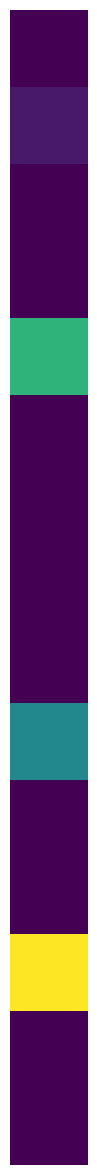

In [42]:
values = np.array([0.0, 0.11519615, 0.0, 0.0, 1.0649, 0.0, 0.0, 0.0, 0.0, 0.7685, 0.0, 0.0, 1.6421, 0.0, 0.0])

# Plot the values as a column of square pixels
plt.figure(figsize=(1, 15))  # Adjust figure size as needed
plt.imshow(values.reshape(-1, 1), cmap='viridis', aspect='auto')
plt.axis('off')
plt.show()
